# Clustering algorithms based survival analysis 

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import PSG_SNF_Functions as PSG


In [8]:
ndf= pd.read_csv('data/Lung/numerical.csv')
Lung_patients = ndf['vha_id']
Lung_cancer_type = ndf['cancer_type']

SM = pd.read_csv('data/Lung/SM/MySim.csv')

lung_All0     = {'vha_id': Lung_patients    , 'cluster': list(labels), 'cancer_type': Lung_cancer_type }
df_lung0 = pd.DataFrame(lung_All0)

survival = pd.read_csv('data/survival.csv')
Lung_survival0 = pd.merge(df_lung0, survival, on='vha_id')    



Number of patients in cluser 0 = 547
Number of patients in cluser 1 = 65
Number of patients in cluser 2 = 161
716.0
     SCLC_lower_0.95  SCLC_upper_0.95
0.5            590.0            970.0
P-value (0,1) =  0.0007351651191957134
P-value (0,2) =  0.8610346077055308
P-value (1,2) =  0.0008006640525357157


/home/almusawiaf/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,vha_id,cluster,cancer_type,state,firstVisit,lastVisit,Days
0,506-NSCLC-01,2,NSCLC,0,11/18/2009,5/5/2010,168
1,506-NSCLC-02,0,NSCLC,0,11/10/2009,5/9/2010,180
2,506-NSCLC-03,0,NSCLC,0,12/9/2009,8/28/2010,262
3,506-NSCLC-04,0,NSCLC,0,11/18/2009,11/21/2010,368
4,506-NSCLC-05,0,NSCLC,1,12/17/2009,1/15/2011,394


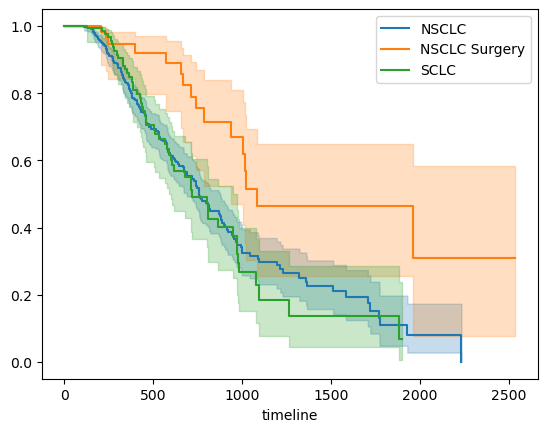

In [18]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)
kmeans.fit(SM)
labels = kmeans.predict(SM)

lung_All0     = {'vha_id': Lung_patients    , 'cluster': list(labels), 'cancer_type': Lung_cancer_type }
df_lung0 = pd.DataFrame(lung_All0)

survival = pd.read_csv('data/survival.csv')
Lung_survival0 = pd.merge(df_lung0, survival, on='vha_id')    


groups0 = dict(tuple(Lung_survival0.groupby('cancer_type')))
groups0 = [groups0[i] for i in groups0]
PSG.groups_details(groups0, ['NSCLC', 'NSCLC Surgery', 'SCLC'])
groups0[0].head()


Number of patients in cluser 0 = 322
Number of patients in cluser 1 = 266
Number of patients in cluser 2 = 185
879.0
     2_lower_0.95  2_upper_0.95
0.5         668.0        1017.0
P-value (0,1) =  0.5018201672534206
P-value (0,2) =  0.4836122767736777
P-value (1,2) =  0.1767641423970562


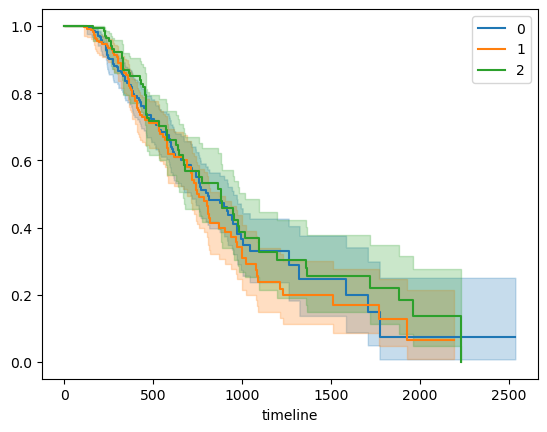

In [20]:
groups = dict(tuple(Lung_survival0.groupby('cluster')))
groups = [groups[i] for i in groups]
PSG.groups_details(groups, [0,1,2,3])